In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import sys
sys.path.insert(1, '..')
from main_code.utils.config.config import Config
import json

In [2]:
def load_result_data(test_set, result_folder):
    # data path
    base_path = '../logs/test'
    result_path = f'{base_path}/{test_set}/{result_folder}'
    result_file = f'{result_path}/result.json'
    config_file = f'{result_path}/config.yml'
    # load result data
    with open(result_file, 'r') as f:
        result = json.load(f)
    config = Config(config_yaml=config_file, restrictive=False)
    return result, config

In [3]:
def scatter_plot(x_steps, avg_approx_errors, labels, title, xlabel, save_path, ylabel='Relative error to optimal [%]'):
    # plot stuff
    mpl.style.use('seaborn-paper')
    fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

    for errors in avg_approx_errors:
        axs.scatter(x_steps, errors, s=30, label='Original POMO')

    axs.set_ylabel(ylabel)
    axs.set_xlabel(xlabel)
    axs.set_title(title)
    axs.set_xticks(x_steps)
    # axs.set_ylim([0, 0.02])
    axs.legend()
    plt.tight_layout()
    plt.savefig(save_path, dpi=400)

In [4]:
def boxplot():
    mpl.style.use('seaborn-paper')

# MCTS

In [5]:
test_set = 'uniform_n_20_128'
result_folders = ['2022-01-18_19:05:23__n_20_128_traj_100_ssteps_8_pomo_aug',
                  '2022-01-18_17:12:57__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-18_17:16:44__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-18_17:23:53__n_20_128_traj_100_ssteps_8_pomo_aug_mcts']
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]

In [6]:

avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.clip(np.array(result['approx_errors']), a_min=0.0, a_max=None) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
num_playouts = [config.test['num_playouts'] for result, config in result_data]

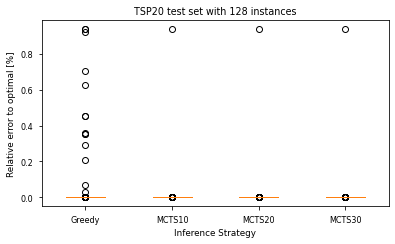

In [7]:
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

positions = np.arange(len(avg_approx_errors)) + 1
axs.boxplot(approx_errors, positions=positions)
# axs.bar(x=positions, height=avg_approx_errors)
axs.set_xticklabels(['Greedy', 'MCTS10', 'MCTS20', 'MCTS30'])
axs.set_xlabel('Inference Strategy')
axs.set_ylabel('Relative error to optimal [%]')
# axs.set_yscale('log')
# axs.legend()
axs.set_title('TSP20 test set with 128 instances')
plt.tight_layout()
plt.savefig('../results/plots/tsp20_mcts_boxplot.png', dpi=300)
plt.show()

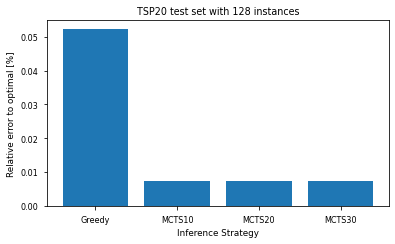

In [8]:
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

positions = np.arange(len(avg_approx_errors)) + 1
axs.bar(x=positions, height=avg_approx_errors)
axs.set_xticks(positions)
axs.set_xticklabels(['Greedy', 'MCTS10', 'MCTS20', 'MCTS30'])
axs.set_xlabel('Inference Strategy')
axs.set_ylabel('Relative error to optimal [%]')
# axs.set_yscale('log')
# axs.legend()
axs.set_title('TSP20 test set with 128 instances')
plt.tight_layout()
plt.savefig('../results/plots/tsp20_mcts_barplot.png', dpi=300)
plt.show()

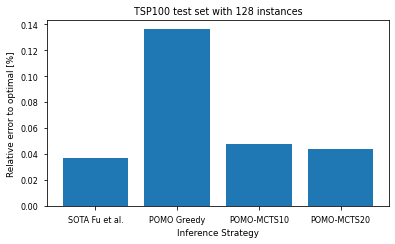

In [11]:
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

positions = np.arange(4) + 1
axs.bar(x=positions, height=[0.0370, 0.1363, 0.0474, 0.0438])
axs.set_xticks(positions)
axs.set_xticklabels(['SOTA Fu et al.', 'POMO Greedy', 'POMO-MCTS10', 'POMO-MCTS20'])
axs.set_xlabel('Inference Strategy')
axs.set_ylabel('Relative error to optimal [%]')
# axs.set_yscale('log')
# axs.legend()
axs.set_title('TSP100 test set with 128 instances')
plt.tight_layout()
plt.savefig('../results/plots/tsp100_mcts_barplot.png', dpi=300)
plt.show()

# Different number of sampling steps

In [33]:
test_set = 'uniform_n_100_10000'
result_folders = ['2022-01-04_23:47:43__n_100_10000_traj_100_ssteps_16',
                  '2022-01-04_23:51:00__n_100_10000_traj_100_ssteps_32',
                  '2022-01-04_23:57:31__n_100_10000_traj_100_ssteps_64']
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]

In [37]:

avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.array(result['approx_errors']) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
sampling_steps = [config.test['sampling_steps'] for result, config in result_data]

In [ ]:
scatter_plot(sampling_steps, [avg_approx_errors])

# Different number of nodes

In [20]:
# get the data
pred_lengths = [3.827198, 5.69195, 7.77015, 10.85755, 13.7307, 16.745489, 19.669]
opt_lengths = [3.8303, 5.6906, 7.7609, 10.7191, 12.95, 14.89, 16.5458]
approx_to_optimal = (np.array(pred_lengths) / np.array(opt_lengths) - 1) * 100
fuetal_approx = [0.00004, 0.0145, 0.0370, 0.8844, np.nan, np.nan, 2.5365]
num_nodes = [20, 50, 100, 200, 300, 400, 500]

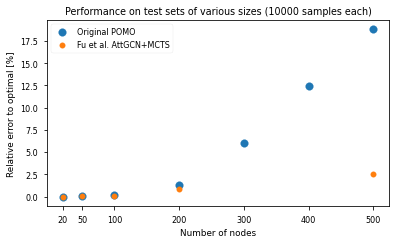

In [27]:
# plot stuff
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

axs.scatter(num_nodes, approx_to_optimal, s=60, label='Original POMO')
axs.scatter(num_nodes, fuetal_approx, label='Fu et al. AttGCN+MCTS')

axs.set_ylabel('Relative error to optimal [%]')
axs.set_xlabel('Number of nodes')
axs.set_title('Performance on test sets of various sizes (10000 samples each)')
axs.set_xticks(num_nodes)
# axs.set_ylim([0, 0.02])
axs.legend()
plt.tight_layout()
plt.savefig('../results/plots/POMO_generalization.png', dpi=400)